[출처 : https://wikidocs.net/31379](https://wikidocs.net/31379)
# 1) 트랜스포머(Transformer)

* 어텐션 메커니즘에 대한 이해가 필요함<br>
<br>
트랜스포머(Transformer)는 2017년 구글이 발표한 논문인 "Attention is all you need"에서 나온 모델로 기존의 seq2seq의 구조인 인코더-디코더를 따르면서도, 논문의 이름처럼 어텐션(Attention)만으로 구현한 모델입니다.<br>
<br>
이 모델은 RNN을 사용하지 않고, 인코더-디코더 구조를 설계하였음에도 번역 성능에서도 RNN보다 우수한 성능을 보여주었습니다.<br>
<br>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## 1. 기존의 seq2seq 모델의 한계
기존의 seq2seq를 상기해봅시다. <br>
<br>
기존의 seq2seq 모델은 인코더-디코더 구조로 구성되어져 있었습니다. <br>
<br>
여기서 인코더는 입력 시퀀스를 하나의 벡터 표현으로 압축하고, 디코더는 이 벡터 표현을 통해서 출력 시퀀스를 만들어냈습니다. <br>
<br>
하지만 이러한 구조는 인코더가 입력 시퀀스를 하나의 벡터로 압축하는 과정에서 입력 시퀀스의 정보가 일부 손실된다는 단점이 있었고, 이를 보정하기 위해 어텐션이 사용되었습니다. <br>
<br>
그런데 어텐션을 RNN의 보정을 위한 용도로서 사용하는 것이 아니라 어텐션만으로 인코더와 디코더를 만들어보면 어떨까요?
<br>
<br>
## 2. 트랜스포머(Transformer)의 주요 하이퍼파라미터

시작에 앞서 트랜스포머의 하이퍼파라미터를 정의합니다.<br>
<br>
각 하이퍼파라미터의 의미에 대해서는 뒤에서 설명하기로하고, 여기서는 트랜스포머에는 이러한 하이퍼파라미터가 존재한다는 정도로만 이해해보겠습니다. <br>
<br>
아래에서 정의하는 수치는 트랜스포머를 제안한 논문에서 사용한 수치로 하이퍼파라미터는 사용자가 모델 설계시 임의로 변경할 수 있는 값들입니다.<br>
<br>
$d_{model} = 512$ <br>
<br>
트랜스포머의 인코더와 디코더에서의 정해진 입력과 출력의 크기를 의미합니다. <br>
<br>
임베딩 벡터의 차원 또한 $d_{model}$이며, 각 인코더와 디코더가 다음 층의 인코더와 디코더로 값을 보낼 때에도 이 차원을 유지합니다. <br>
<br>논문에서는 512입니다.<br>
<br>
$\text{num_layers} = 6$<br>
<br>
트랜스포머에서 하나의 인코더와 디코더를 층으로 생각하였을 때, 트랜스포머 모델에서 인코더와 디코더가 총 몇 층으로 구성되었는지를 의미합니다. <br>
<br>
논문에서는 인코더와 디코더를 각각 총 6개 쌓았습니다.<br>
<br>
$\text{num_heads} = 8$<br>
<br>
트랜스포머에서는 어텐션을 사용할 때, 한 번 하는 것 보다 여러 개로 분할해서 병렬로 어텐션을 수행하고 결과값을 다시 하나로 합치는 방식을 택했습니다. 이때 이 병렬의 개수를 의미합니다.<br>
<br>
$d_{ff} = 2048$
<br>
트랜스포머 내부에는 피드 포워드 신경망이 존재하며 해당 신경망의 은닉층의 크기를 의미합니다. 피드 포워드 신경망의 입력층과 출력층의 크기는 $d_{model}$입니다.<br>
<br>
<br>
## 3. 트랜스포머(Transformer)
![](https://wikidocs.net/images/page/31379/transformer1.PNG)
<br>
트랜스포머는 RNN을 사용하지 않지만 기존의 seq2seq처럼 인코더에서 입력 시퀀스를 입력받고, 디코더에서 출력 시퀀스를 출력하는 인코더-디코더 구조를 유지하고 있습니다. <br>
<br>
이전 seq2seq 구조에서는 인코더와 디코더에서 각각 하나의 RNN이 t개의 시점(time step)을 가지는 구조였다면 이번에는 인코더와 디코더라는 단위가 N개로 구성되는 구조입니다.<br>
<br>트랜스포머를 제안한 논문에서는 인코더와 디코더의 개수를 각각 6개 사용하였습니다.<br>
<br>
![](https://wikidocs.net/images/page/31379/transformer2.PNG)
위의 그림은 인코더와 디코더가 6개씩 존재하는 트랜스포머의 구조를 보여줍니다. <br>
<br>
인코더와 디코더가 각각 여러 개 쌓여있다는 의미를 사용할 때는 알파벳 s를 뒤에 붙여 encoders, decoders라고 표현하겠습니다.
<br>
![](https://wikidocs.net/images/page/31379/transformer4_final_final_final.PNG)
위의 그림은 인코더로부터 정보를 전달받아 디코더가 출력 결과를 만들어내는 트랜스포머 구조를 보여줍니다.<br>
<br>
디코더는 마치 기존의 seq2seq 구조처럼 시작 심볼 $<sos>$를 입력으로 받아 종료 심볼 $<eos>$가 나올 때까지 연산을 진행합니다. <br>
<br>
이는 RNN은 사용되지 않지만 여전히 인코더-디코더의 구조는 유지되고 있음을 보여줍니다.
<br>
트랜스포머의 내부 구조를 조금씩 확대해가는 방식으로 트랜스포머를 이해해봅시다. <br>
<br>

우선 인코더와 디코더의 구조를 이해하기 전에 트랜스포머의 입력에 대해서 이해해보겠습니다.<br>

트랜스포머의 인코더와 디코더는 단순히 각 단어의 임베딩 벡터들을 입력받는 것이 아니라 임베딩 벡터에서 조정된 값을 입력받는데 이에 대해서 알아보기 위해 입력 부분을 확대해보겠습니다.<br>
<br>



## 4. 포지셔널 인코딩(Positional Encoding)
   
   
트랜스포머의 내부를 이해하기 전에 우선 **트랜스포머의 입력**에 대해서 알아보겠습니다. 

<br>
<br>
RNN이 자연어 처리에서 유용했던 이유는 단어의 위치에 따라 단어를 순차적으로 입력받아서 처리하는 RNN의 특성으로 인해 각 단어의 위치 정보(position information)를 가질 수 있다는 점에 있었습니다.<br>
<br>
하지만 트랜스포머는 단어 입력을 순차적으로 받는 방식이 아니므로 단어의 위치 정보를 다른 방식으로 알려줄 필요가 있습니다. <br>
<br>
트랜스포머는 단어의 위치 정보를 얻기 위해서 각 단어의 임베딩 벡터에 위치 정보들을 더하여 모델의 입력으로 사용하는데, 이를 포지셔널 인코딩(positional encoding)이라고 합니다.<br>

![](https://wikidocs.net/images/page/31379/transformer5_final_final.PNG)
<br>
위의 그림은 입력으로 사용되는 임베딩 벡터들이 트랜스포머의 입력으로 사용되기 전에 포지셔널 인코딩의 값이 더해지는 것을 보여줍니다. <br>
임베딩 벡터가 인코더의 입력으로 사용되기 전 포지셔널 인코딩값이 더해지는 과정을 시각화하면 아래와 같습니다.<br>
<br>
![](https://wikidocs.net/images/page/31379/transformer6_final.PNG)
포지셔널 인코딩 값들은 어떤 값이기에 위치 정보를 반영해줄 수 있는 것일까요? 트랜스포머는 위치 정보를 가진 값을 만들기 위해서 아래의 두 개의 함수를 사용합니다.<br>
<br>
$PE_{(pos,\ 2i)}=sin(pos/10000^{2i/d_{model}})$<br>
$PE_{(pos,\ 2i+1)}=cos(pos/10000^{2i/d_{model}})$<br>
<br>
사인 함수와 코사인 함수의 그래프를 상기해보면 요동치는 값의 형태를 생각해볼 수 있는데, 트랜스포머는 사인 함수와 코사인 함수의 값을 임베딩 벡터에 더해주므로서 단어의 순서 정보를 더하여 줍니다. <br>
<br>
그런데 위의 두 함수에는 $pos,i, d_{model}$등의 생소한 변수들이 있습니다. <br>
위의 함수를 이해하기 위해서는 위에서 본 임베딩 벡터와 포지셔널 인코딩의 덧셈은 사실 임베딩 벡터가 모여 만들어진 문장 행렬과 포지셔널 인코딩 행렬의 덧셈 연산을 통해 이루어진다는 점을 이해해야 합니다.<br>
<br>
![](https://wikidocs.net/images/page/31379/transformer7.PNG)
$pos$는 입력 문장에서의 임베딩 벡터의 위치를 나타내며, $i$는 임베딩 벡터 내의 차원의 인덱스를 의미합니다. <br>
<br>
위의 식에 따르면 임베딩 벡터 내의 각 차원의 인덱스가 짝수인 경우에는 사인 함수의 값을 사용하고 홀수인 경우에는 코사인 함수의 값을 사용합니다. <br>
<br>
위의 수식에서 $(pos,\ 2i)$일 때는 사인 함수를 사용하고, $(pos,\ 2i+1)$일 때는 코사인 함수를 사용하고 있음을 주목합시다.<br>
<br>
또한 위의 식에서 $d_{model}$은 트랜스포머의 모든 층에서 출력 차원을 의미하는 트랜스포머의 하이퍼파라미터입니다.<br>
<br>
앞으로 보게 될 트랜스포머의 각종 구조에서 $d_{model}$의 값이 계속해서 등장하는 이유입니다. <br>
<br>
임베딩 벡터 또한 $d_{model}$의 차원을 가지는데 위의 그림에서는 마치 4로 표현되었지만 실제 논문에서는 512의 값을 가집니다.<br>
<br>
<br>
위와 같은 포지셔널 인코딩 방법을 사용하면 순서 정보가 보존되는데, 예를 들어 각 임베딩 벡터에 포지셔널 인코딩의 값을 더하면 같은 단어라고 하더라도 문장 내의 위치에 따라서 트랜스포머의 입력으로 들어가는 임베딩 벡터의 값이 달라집니다.<br>
<br>
이에 따라 트랜스포머의 입력은 순서정보가 고려된 임베딩 벡터가 됩니다. 이를 코드로 구현하면 아래와 같습니다.

In [6]:
class PositionalEncoding(tf.keras.layers.Layer):
    def __init__(self, position, d_model):
        super(PositionalEncoding, self).__init__()
        self.pos_encoding = self.positional_encoding(position, d_model)
        
    def get_angles(self, position, i, d_model):
        angles = 1 / tf.pow(10000, (2 * (i//2)) / tf.cast(d_model, tf.float32))
        return position * angles
    
    def positional_encoding(self, position, d_model):
        angle_rads = self.get_angles(
            position = tf.range(position, dtype=tf.float32)[:, tf.newaxis],
            i = tf.range(d_model, dtype=tf.float32)[tf.newaxis, :],
            d_model=d_model)
        
        # 배열의 짝수 인덱스 (2i)에는 사인 함수 적용
        sines = tf.math.sin(angle_rads[:, 0::2])
        
        # 배열의 홀수 인덱스 (2i+1)에는 코사인 함수 적용
        cosines = tf.math.cos(angle_rads[:, 1::2])
        
        angle_rads = np.zeros(angle_rads.shape)
        angle_rads[:, 0::2] = sines
        angle_rads[:, 1::2] = cosines
        pos_encoding = tf.constant(angle_rads)
        pos_encoding = pos_encoding[tf.newaxis, ...]
        
        print(pos_encoding.shape)
        return tf.cast(pos_encoding, tf.float32)
    
def call(self, inputs):
    return inputs + self.pos_encoding[:, :tf.shape(inputs)[1], :]

50 x 128의 크기를 가지는 포지셔널 인코딩 행렬을 시각화하여 어떤 형태를 가지는지 확인해봅시다.<br>
이는 입력 문장의 단어가 50개이면서, 각 단어가 128차원의 임베딩 벡터를 가질 때 사용할 수 있는 행렬입니다.

(1, 50, 128)


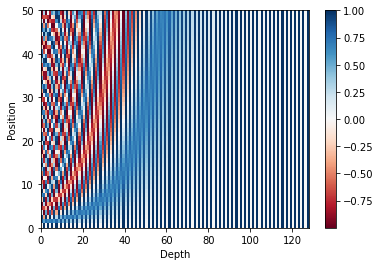

In [8]:
# 문장의 길이 50, 임베딩 벡터의 차원 128
sample_pos_encoding = PositionalEncoding(50, 128)

plt.pcolormesh(sample_pos_encoding.pos_encoding.numpy()[0], cmap='RdBu')
plt.xlabel('Depth')
plt.xlim((0, 128))
plt.ylabel('Position')
plt.colorbar()
plt.show()

## 5. 어텐션(Attention)
트랜스포머에서 사용되는 세 가지의 어텐션에 대해서 간단히 정리해봅시다. 지금은 큰 그림을 이해하는 것에만 집중합니다.<br>
![](https://wikidocs.net/images/page/31379/attention.PNG)
첫번째 그림인 셀프 어텐션은 인코더에서 이루어지지만, 두번째 그림인 셀프 어텐션과 세번째 그림인 인코더-디코더 어텐션은 디코더에서 이루어집니다.<br>
<br>
셀프 어텐션은 본질적으로 Query, Key, Value가 동일한 경우를 말합니다. <br>
반면, 세번째 그림 인코더-디코더 어텐션에서는 Query가 디코더의 벡터인 반면에 Key와 Value가 인코더의 벡터이므로 셀프 어텐션이라고 부르지 않습니다.<br>
<br>
* 주의할 점은 여기서 Query, Key 등이 같다는 것은 벡터의 값이 같다는 것이 아니라 벡터의 출처가 같다는 의미입니다.<br>

<br>정리하면 다음과 같습니다.
```
인코더의 셀프 어텐션 : Query = Key = Value
디코더의 마스크드 셀프 어텐션 : Query = Key = Value
디코더의 인코더-디코더 어텐션 : Query : 디코더 벡터 / Key = Value : 인코더 벡터
```

![](https://wikidocs.net/images/page/31379/transformer_attention_overview.PNG)
<br>
위 그림은 트랜스포머의 아키텍처에서 세가지 어텐션이 각각 어디에서 이루어지는지를 보여줍니다.<br>
세 개의 어텐션에 추가적으로 '멀티 헤드'라는 이름이 붙어있습니다. 이는 트랜스포머가 어텐션을 병렬적으로 수행하는 방법을 의미합니다.

## 6. 인코더(Encoder)
<br>
인코더의 구조에 대해서 알아보겠습니다.<br>
<br>

![](https://wikidocs.net/images/page/31379/transformer9_final_ver.PNG)

트랜스포머는 하이퍼파라미터인 $\text{num_layers}$ 개수의 인코더 층을 쌓습니다.<br>
논문에서는 총 6개의 인코더 층을 사용하였습니다. 인코더를 하나의 층이라는 개념으로 생각한다면, 하나의 인코더 층은 크게 총 2개의 서브층(sublayer)으로 나뉘어집니다.<br>
<br>
셀프 어텐션과 피드 포워드 신경망입니다. 위의 그림에서는 멀티 헤드 셀프 어텐션과 포지션 와이즈 피드 포워드 신경망이라고 적혀있지만, <br>
멀티 헤드 셀프 어텐션은 셀프 어텐션을 병렬적으로 사용하였다는 의미고, 포지션 와이즈 피드 포워드 신경망은 우리가 알고있는 일반적인 피드 포워드 신경망입니다.

## 7. 인코더의 셀프 어텐션
<br>
트랜스포머에서는 셀프 어텐션이라는 어텐션 기법이 등장하는데 앞서 배웠던 어텐션 함수에 대해서 복습하고, 셀프 어텐션이 앞서 배웠던 어텐션과 무엇이 다른지 알아보겠습니다.<br>
<br>
### 1) 셀프 어텐션의 의미와 이점
<br>
어텐션 함수는 주어진 '쿼리(Query)'에 대해서 모든 '키(Key)'와의 유사도를 각각 구합니다. 그리고 구해낸 이 유사도를 가중치로 하여 키와 맵핑되어있는 각각의 '값(Value)'에 반영해줍니다.<br>
<br>

그리고 유사도가 반영된 '값(Value)'을 모두 가중합하여 리턴합니다.
![](https://wikidocs.net/images/page/22893/%EC%BF%BC%EB%A6%AC.PNG)
<br>
여기까지는 앞서 배운 어텐션의 개념입니다. 그런데 어텐션 중에서는 셀프 어텐션(self-attention)이라는 것이 있습니다. <br>
<br>
어텐션을 자기 자신에게 수행한다는 의미입니다. 앞서 배운 seq2seq에서 어텐션을 사용할 경우의 Q, K, V의 정의를 다시 생각해봅시다.
<br>
```
Q = Query : t 시점의 디코더 셀에서의 은닉 상태
K = Keys : 모든 시점의 인코더 셀의 은닉 상태들
V = Values : 모든 시점의 인코더 셀의 은닉 상태들
```
<br>
사실 t 시점이라는 것은 계속 변화하면서 반복적으로 쿼리를 수행하므로 결국 전체 시점에 대해서 일반화를 할 수도 있습니다.<br>
<br>

```
Q = Querys : 모든 시점의 디코더 셀에서의 은닉 상태들
K = Keys : 모든 시점의 인코더 셀의 은닉 상태들
V = Values : 모든 시점의 인코더 셀의 은닉 상태들
```

이처럼 기존에는 디코더 셀의 은닉 상태가 Q이고 인코더 셀의 은닉 상태가 K라는 점에서 Q와 K가 서로 다른 값을 가지고 있었습니다.<br>
<br>
그런데 셀프 어텐션에서는 Q, K, V가 전부 동일합니다. 트랜스포머의 셀프 어텐션에서의 Q, K, V는 아래와 같습니다.<br>
<br>

```
Q : 입력 문장의 모든 단어 벡터들
K : 입력 문장의 모든 단어 벡터들
V : 입력 문장의 모든 단어 벡터들
```

셀프 어텐션에 대한 구체적인 사항을 배우기 전에 셀프 어텐션을 통해 얻을 수 있는 대표적인 효과에 대해서 이해해봅시다.<br>
<br>

![](https://wikidocs.net/images/page/31379/transformer10.png)

<br>
위의 그림은 트랜스포머에 대한 구글 AI 블로그 포스트에서 가져왔습니다. <br>
<br>
위의 예시 문장을 번역하면 '그 동물은 길을 건너지 않았다. 왜냐하면 그것은 너무 피곤하였기 때문이다.' 라는 의미가 됩니다. <br>
<br>
그런데 여기서 그것(it)에 해당하는 것은 과연 길(street)일까요? 동물(animal)일까요? 우리는 피곤한 주체가 동물이라는 것을 아주 쉽게 알 수 있지만 기계는 그렇지 않습니다. <br>
<br>
하지만 셀프 어텐션은 입력 문장 내의 단어들끼리 유사도를 구하므로서 그것(it)이 동물(animal)과 연관되었을 확률이 높다는 것을 찾아냅니다.<br>
<br>
트랜스포머에서의 셀프 어텐션의 동작 메커니즘을 알아봅시다.<br>

### 2) Q, K, V 벡터 얻기
<br>
앞서 셀프 어텐션은 입력 문장의 단어 벡터들을 가지고 수행한다고 하였는데, 사실 셀프 어텐션은 인코더의 초기 입력인 $d_{model}$의 차원을 가지는 단어 벡터들을 사용하여 셀프 어텐션을 수행하는 것이 아니라<br>
우선 각 단어 벡터들로부터 Q벡터, K벡터, V벡터를 얻는 작업을 거칩니다.<br>
<br>
이때 이 Q벡터, K벡터, V벡터들은 초기 입력인 $d_{model}$의 차원을 가지는 단어 벡터들보다 더 작은 차원을 가지는데, <br>
논문에서는 $d_{model} = 512$의 차원을 가졌던 각 단어 벡터들을 64의 차원을 가지는 Q벡터, K벡터, V벡터로 변환하였습니다.<br>
<br>
64라는 값은 트랜스포머의 또 다른 하이퍼파라미터인 $\text{num_heads}$로 인해 결정되는데, 트랜스포머는 $d_{model}$을 $\text{num_heads}$로 나눈 값을 각 Q벡터, K벡터, V벡터의 차원으로 결정합니다.<br>
<br>
논문에서는 $\text{num_heads}$를 8로 하였습니다. 그림을 통해 이해해봅시다.<br>
<br>
예를 들어 여기서 사용하고 있는 예문 중 student라는 단어 벡터를 Q, K, V의 벡터로 변환하는 과정을 보겠습니다.

![](https://wikidocs.net/images/page/31379/transformer11.PNG)
<br>
기존의 벡터로부터 더 작은 벡터는 가중치 행렬을 곱하므로서 완성됩니다. 각 가중치 행렬은 $d_{model} × (d_{model}\text{/num_heads})$의 크기를 가집니다.<br>
<br>
이 가중치 행렬은 훈련 과정에서 학습됩니다. 즉, 논문과 같이 $d_{model}=512$이고 $\text{num_heads}=8$라면, 각 벡터에 3개의 서로 다른 가중치 행렬을 곱하고 64의 크기를 가지는 Q, K, V 벡터를 얻어냅니다.<br>
<br>
위의 그림은 단어 벡터 중 student벡터로부터 Q, K, V벡터를 얻어내는 모습을 보여줍니다. 모든 단어 벡터에 위와 같은 과정을 거치면 I, am, a, student는 각각의 Q, K, V벡터를 얻습니다.

### 3) 스케일드 닷-프로덕트 어텐션(Scaled dot-product Attention)
<br>
Q, K, V벡터를 얻었다면 지금부터는 기존에 배운 어텐션 메커니즘과 동일합니다.<br>
각 Q벡터는 모든 K벡터에 대해서 어텐션 스코어를 구하고 어텐션 분포를 구한 뒤에 이를 사용하여 모든 V벡터를 가중합하여 어텐션 값 또는 컨텍스트 벡터를 구하게 됩니다.<br>
그리고 이를 모든 Q벡터에 대해서 반복합니다.<br>
<br>
그런데 앞서 어텐션 챕터에서 어텐션 함수의 종류는 다양하다고 언급한 바 있습니다. <br>
<br>
트랜스포머에서는 내적만을 사용하는 어텐션 함수 $score(q, k)=q⋅k$가 아니라 여기에 특정값으로 나눠준 어텐션 함수인 $score(q, k)=q⋅k/\sqrt{n}$를 사용합니다.<br>
<br>
이러한 함수를 사용하는 어텐션을 닷-프로덕트 어텐션(dot-product attention)에서 값을 스케일링하는 것을 추가하였다고 하여

**스케일드 닷-프로덕트 어텐션(Scaled dot-product Attention)**이라고 합니다.  

<br>

![](https://wikidocs.net/images/page/31379/transformer13.PNG)
<br>
우선 단어 I에 대한 Q벡터를 기준으로 설명해보겠습니다. 지금부터 설명하는 과정은 am에 대한 Q벡터, a에 대한 Q벡터, student에 대한 Q벡터에 대해서도 모두 동일한 과정을 거칩니다. <br>
<br>
위의 그림은 단어 I에 대한 Q벡터가 모든 K벡터에 대해서 어텐션 스코어를 구하는 것을 보여줍니다. 위의 128과 32는 저자가 임의로 가정한 수치로 신경쓰지 않아도 좋습니다.<br>
<br>
위의 그림에서 어텐션 스코어는 각각 단어 I가 단어 I, am, a, student와 얼마나 연관되어 있는지를 보여주는 수치입니다. <br>
<br>
트랜스포머에서는 두 벡터의 내적값을 스케일링하는 값으로 K벡터의 차원을 나타내는 $d_{k}$에 루트를 씌운 $\sqrt{d_{k}}$ 사용하는 것을 택했습니다.<br>
<br>
앞서 언급하였듯이 논문에서 $d_{k}$는 $d_{model}\text{/num_heads}$라는 식에 따라서 64의 값을 가지므로 $\sqrt{d_{k}}$ 는 8의 값을 가집니다.

![](https://wikidocs.net/images/page/31379/transformer14_final.PNG)

이제 어텐션 스코어에 소프트맥스 함수를 사용하여 어텐션 분포(Attention Distribution)을 구하고, 각 V벡터와 가중합하여 어텐션값(Attention Value)을 구합니다. <br>
<br>
이를 단어 I에 대한 어텐션 값 또는 단어 I에 대한 컨텍스트 벡터(context vector)라고도 할 수 있습니다. <br>
<br>
am에 대한 Q벡터, a에 대한 Q벡터, student에 대한 Q벡터에 대해서도 모두 동일한 과정을 반복하여 각각에 대한 어텐션 값을 구합니다.<br>
<br>
그런데 한가지 의문이 생깁니다. 굳이 각 Q벡터마다 일일히 따로 연산할 필요가 있을까요?

### 4) 행렬 연산으로 일괄 처리하기
사실 각 단어에 대한 Q, K, V 벡터를 구하고 스케일드 닷-프로덕트 어텐션을 수행하였던 위의 과정들은 벡터 연산이 아니라 행렬연산을 사용하면 일괄 계산이 가능합니다. <br>
<br>
지금까지 벡터 연산으로 설명하였던 이유는 이해를 돕기 위한 과정이고 실제로는 행렬 연산으로 구현됩니다.<br>
<br>
위의 과정을 벡터가 아닌 행렬 연산으로 이해해봅시다. 우선, 각 단어 벡터마다 일일히 가중치 행렬을 곱하는 것이 아니라 문장 행렬에 가중치 행렬을 곱하여 Q행렬, K행렬, V행렬을 구합니다.

![](https://wikidocs.net/images/page/31379/transformer12.PNG)

행렬 연산을 통해 어텐션 스코어는 어떻게 구할 수 있을까요?<br>
<br>
여기서 Q행렬을 K행렬을 전치한 행렬과 곱해준다고 해봅시다. 이렇게 되면 각각의 단어의 Q벡터와 K벡터의 내적이 각 행렬의 원소가 되는 행렬이 결과로 나옵니다.

![](https://wikidocs.net/images/page/31379/transformer15.PNG)

다시 말해 위의 그림의 결과 행렬의 값에 전체적으로 $\sqrt{d_{k}}$를 나누어주면 이는 각 행과 열이 어텐션 스코어 값을 가지는 행렬이 됩니다.<br>
<br>
예를 들어 I행과 student열의 값은 I의 Q벡터와 student의 K벡터의 어텐션 스코어 값입니다. 위 행렬을 어텐션 스코어 행렬이라 합시다.<br>
<br>
어텐션 스코어 행렬을 구하였다면 남은 것은 어텐션 분포를 구하고 이를 사용하여 모든 단어에 대한 어텐션 값을 구하는 일입니다.<br>
<br>
이는 간단하게 어텐션 스코어 행렬에 소프트맥스 함수를 사용하고 V행렬을 곱하는 것으로 해결됩니다.<br>
<br>
이렇게 되면 각 단어의 어텐션 값을 모두 가지는 어텐션 값 행렬이 결과로 나옵니다.

![](https://wikidocs.net/images/page/31379/transformer16.PNG)

위의 그림은 행렬 연산을 통해 모든 값이 일괄 계산되는 과정을 식으로 보여줍니다. <br>
<br>
해당 식은 실제 트랜스포머 논문에 기재된 아래 수식과 정확하게 일치하는 식입니다.<br>
<br>
$Attention(Q, K, V) = softmax({QK^T\over{\sqrt{d_k}}})V$
<br>
위의 행렬 연산에 사용된 행렬의 크기를 모두 정리해봅시다. <br>
<br>
우선 입력 문장의 길이를 seq_len이라고 해봅시다. 그렇다면 문장행렬의 크기는 $(\text{seq_len},\ d_{model})$입니다.<br>
<br>
여기에 3개의 가중치 행렬을 곱해서 Q, K, V행렬을 만들어야 합니다.<br>
<br>
<br>
우선 행렬의 크기를 정의하기 위해 행렬의 각 행에 해당되는 Q벡터와 K벡터의 차원을 $d_{k}$라고 하고, V벡터의 차원을 $d_{v}$라고 해봅시다.<br>
<br>
그렇다면 Q행렬과 K행렬의 크기는 $(\text{seq_len},\ d_{k})$이며 V행렬의 크기는 $(\text{seq_len},\ d_{v})$가 되어야 합니다. <br>
<br>
그렇다면 문장 행렬과 Q, K, V 행렬의 크기로부터 가중치 행렬의 크기 추정이 가능합니다. <br>
<br>
$W^{Q}$와 $W^{K}$는 $(d_{model},\ d_{k})$의 크기를 가지며, $W^{V}$는 $(d_{model},\ d_{v})$의 크기를 가집니다. 단, 논문에서는 $d_{k}$와 $d_{v}$의 차원은 $d_{model}\text{/num_heads}$와 같습니다.<br>
<br>
즉, $d_{model}\text{/num_heads}= d_{k}=d_{v}$입니다.<br>
<br>
결과적으로 $softmax({QK^T\over{\sqrt{d_k}}})V$식을 적용하여 나오는 어텐션 값 행렬 $a$의 크기는 $(\text{seq_len},\ d_{v})$이 됩니다.<br>
<br>
코드로 작성하면 아래와 같습니다.
<br>
<br>
### 5) 스케일드 닷-프로덕트 어텐션 구현하기

In [20]:
def scaled_dot_product_attention(query, key, value, mask):
    # query 크기 : (batch_size, num_heads, query의 문장 길이, d_model/num_heads)
    # key 크기 : (batch_size, num_heads, key의 문장길이, d_model/num_heads)
    # value 크기 : (batch_size, num_heads, value의 문장 길이, d_model/num_heads)
    # padding_mask : (batch_size, 1, 1, key의 문장길이)
    
    # Q와 K의 곱. djxpstus tmzhdj godfuf.
    matmul_qk = tf.matmul(query, key, transpose_b=True)
    
    # 스케일링
    # dk의 루트값으로 나눠준다.
    depth = tf.cast(tf.shape(key)[-1], tf.float32)
    logits = matmul_qk / tf.math.sqrt(depth)
    
    # 마스킹. 어텐션 스코어 행렬의 마스킹 할 위치에 매우 작은 음수값을 넣는다.
    # 매우 작은 값이므로 소프트맥스 함수를 지나면 행렬의 해당 위치의 값은 0이 된다.
    if mask is not None:
        logits += (mask * -1e9)
        
    # 소프트맥스 함수는 마지막 차원인 key의 문장 길이 방향으로 수행된다.
    #  attention weight : (batch_size, num_heads, query의 문장 길이, key의 문장 길이)
    attention_weights = tf.nn.softmax(logits, axis=1)
    
    # output : (batch_size, num_heads, query의 문장 길이, d_model/num_heads)
    output = tf.matmul(attention_weights, value)
    
    return output, attention_weights

Q행렬과 K행렬을 전치한 행렬을 곱하고, 소프트맥스 함수를 사용하여 어텐션 분포 행렬을 얻은 뒤에 V행렬과 곱합니다. 코드에서 mask가 사용되는 if문은 아직 배우지 않은 내용으로 지금은 무시합니다.<br>
<br>
<br>
scaled_dot_product_attention 함수가 정상 작동하는지 테스트를 해보겠습니다.<br>
<br>
우선 temp_q, temp_k, temp_v라는 임의의 Query, Key, Value행렬을 만들고 이를 scaled_dot_product_attention 함수에 입력으로 넣어 함수가 리턴하는 값을 출력해보겠습니다.

In [21]:
# 임의의 Query, Key, Value인 Q, K, V 행렬 생성
np.set_printoptions(suppress=True)
temp_k = tf.constant([[10,0,0],
                      [0,10,0],
                      [0,0,10],
                      [0,0,10]], dtype=tf.float32)  # (4, 3)

temp_v = tf.constant([[    1,0],
                      [   10,0],
                      [  100,5],
                      [ 1000,6]], dtype=tf.float32) # (3, 2)

temp_q = tf.constant([[0, 10, 0]], dtype=tf.float32) # (1, 3)

여기서 주목할 점은 Query에 해당하는 temp_q의 값 [0, 10, 0]은 Key에 해당하는 temp_k의 두번째 값 [0, 10, 0]과 일치한다는 점입니다. <br>
그렇다면 어텐션 분포와 어텐션 값은 과연 어떤 값이 나올까요?

In [22]:
# 함수 실행
temp_out, temp_attn = scaled_dot_product_attention(temp_q, temp_k, temp_v, None)
print(temp_attn) # 어텐션 분포(어텐션 가중치의 나열)
print(temp_out) # 어텐션 값

tf.Tensor([[0. 1. 0. 0.]], shape=(1, 4), dtype=float32)
tf.Tensor([[10.  0.]], shape=(1, 2), dtype=float32)


Query는 4개의 Key값 중 두번째 값과 일치하므로 어텐션 분포는 [0, 1, 0, 0]의 값을 가지며 결과적으로 Value의 두번째 값인 [10, 0]이 출력되는 것을 확인할 수 있습니다. 이번에는 Query의 다른 값으로 바꿔보고 함수를 실행해봅시다.<br>
<br>
이번에 사용할 Query값 [0, 0, 10]은 Key의 세번째 값과 네번째 값 두 개의 값 모두와 일치하는 값입니다.

In [34]:
temp_q = tf.constant([[0, 0, 10]], dtype=tf.float32)
temp_out , temp_attn = scaled_dot_product_attention(temp_q, temp_k, temp_v, None)
print(temp_attn)  # 어텐션 분포(어텐션 가중치의 나열)
print(temp_out)   # 어텐션 값

tf.Tensor([[0.  0.  0.5 0.5]], shape=(1, 4), dtype=float32)
tf.Tensor([[550.    5.5]], shape=(1, 2), dtype=float32)


Query의 값은 Key의 세번째 값과 네번째 값 두 개의 값과 모두 유사하다는 의미에서 어텐션 분포는 [0, 0, 0.5, 0.5]의 값을 가집니다.<br>
<br>
결과적으로 나오는 값 [550, 5.5]는 Value의 세번째 값 [100, 5]에 0.5를 곱한 값과 네번째 값 [1000, 6]에 0.5를 곱한 값의 원소별 합입니다.<br>
<br>
이번에는 하나가 아닌 3개의 Query의 값을 함수의 입력으로 사용해보겠습니다.

In [39]:
temp_q = tf.constant([[0, 0, 10], [0, 10, 0], [10, 10, 0]], dtype=tf.float32)  # (3, 3)
temp_out, temp_attn = scaled_dot_product_attention(temp_q, temp_k, temp_v, None)
print(temp_attn)  # 어텐션의 분포(어텐션 가중치의 나열)
print(temp_out)   # 어텐션 값

tf.Tensor(
[[0.  0.  0.5 0.5]
 [0.  1.  0.  0. ]
 [0.5 0.5 0.  0. ]], shape=(3, 4), dtype=float32)
tf.Tensor(
[[550.    5.5]
 [ 10.    0. ]
 [  5.5   0. ]], shape=(3, 2), dtype=float32)


### 6) 멀티 헤드 어텐션(Multi-head Attention)
<br>
앞서 배운 어텐션에서는 $d_{model}$의 차원을 가진 단어 벡터를 $\text{num_heads}$로 나눈 차원을 가지는 Q, K, V벡터로 바꾸고 어텐션을 수행하였습니다.<br>
<br>
논문 기준으로는 512의 차원의 각 단어 벡터를 8로 나누어 64차원의 Q, K, V벡터로 바꾸어서 어텐션을 수행한 셈인데, <br>
이제 $\text{num_heads}$의 의미와 왜 $d_{model}$의 차원을 가진 단어 텍터를 가지고 어텐션을 하지않고 차원을 축소시킨 벡터로 어텐션을 수행하였는지 이해해보겠습니다.<br>

![](https://wikidocs.net/images/page/31379/transformer17.PNG)

<br>
트랜스포머 연구진은 한번의 어텐션을 하는 것보다 여러번의 어텐션을 병렬로 사용하는 것이 더 효과적이라고 판단하였습니다.<br>
<br>
그래서 $d_{model}$의 차원을 $\text{num_heads}$개로 나누어 $d_{model}\text{/num_heads}$의 차원을 가지는 Q, K, V에 대해서 $\text{num_heads}$개의 병렬 어텐션을 수행합니다.<br>
<br>
논문에서는 하이퍼파라미터인 $\text{num_heads}$의 값을 8로 지정하였고, 8개의 병렬 어텐션이 이루어지게 됩니다.<br>
<br>
다시 말해 위에서 설명한 어텐션이 8개로 병렬로 이루어지게 되는데, 이때 각각의 어텐션 값 행렬을 어텐션 헤드라고 부릅니다.<br>
<br>
이때 가중치 행렬 $W^{Q}, W^{K}, W^{V}$의 값은 8개의 어텐션 헤드마다 전부 다릅니다.<br>
<br>
<br>
멀티 헤드 어텐션으로 얻을 수 있는 효과? 어텐션을 병렬로 수행하여 각각 다른 시각으로 정보를 수집하겠다는 것<br>
ex) 케르베로스, 히드라와 같이 머리가 여러개면 시야가 넓듯<br>
<br>
<br>
예를 들어 '그 동물은 길을 건너지 않았다. 왜냐하면 그것은 너무 피곤하였기 때문이다.'에서 단어 그것(it)이 쿼리였다고 가정하자.<br>
<br>
즉, it에 대한 Q벡터로부터 다른 단어와의 연관도를 구하였을 때 첫번째 어텐션 헤드는 '그것(it)'과 '동물(animal)'의 연관도를 높게 본다면, <br>
두번째 어텐션헤드는 '그것(it)'과 '피곤하였기 때문이다(tired)'의 연관도를 높게 볼 수 있습니다.<br>
이는 각 어텐션 헤드는 전부 다른 시각에서 보고있기 때문입니다.<br>
<br>

![](https://wikidocs.net/images/page/31379/transformer18_final.PNG)

<br>
병렬 어텐션을 모두 수행하였다면 모든 어텐션 헤드를 연결(concatenate)합니다.<br>
모두 연결된 어텐션 헤드 행렬의 크기는 $(\text{seq_len},\ d_{model})$가 됩니다.<br>
<br>
<br>
지금까지의 그림에서는 4차원을 $d_{model}=512$로 표현하고, 2차원을 $d_{v}=64$로 표현해왔기 때문에 위의 그림의 행렬의 크기에 혼동이 있을 수 있으나 <br>
8개의 어텐션 헤드의 연결(concatenate)과정의 이해를 위해 이번 행렬만 예외로 위와 같이 $d_{model}$의 크기를 $d_{v}$의 8배인 16차원으로 표현하였습니다.<br>
아래의 그림에서는 다시 $d_{model}$를 4차원으로 표현합니다.<br>
<br>

![](https://wikidocs.net/images/page/31379/transformer19.PNG)

어텐션 헤드를 모두 연결한 행렬은 또 다른 가중치 행렬 $W^{O}$을 곱하게 되는데, 이렇게 나온 결과 행렬이 멀티-헤드 어텐션의 최종결과물입니다.<br>
<br>

위의 그림은 어텐션 헤드를 모두 연결한 행렬이 가중치 행렬 $W^{O}$과 곱해지는 과정을 보여줍니다. <br>
<br>
이때 결과물인 멀티-헤드 어텐션 행렬은 인코더의 입력이었던 문장 행렬의 $(\text{seq_len},\ d_{model})$크기와 동일합니다.<br>
<br>
<br>
다시 말해 인코더의 첫번째 서브층인 멀티-헤드 어텐션 단계를 끝마쳤을 때, 인코더의 입력으로 들어왔던 행렬의 크기가 아직 유지되고 있음을 기억해둡시다.<br>
<br>
첫번째 서브층인 멀티-헤드 어텐션과 두번째 서브층인 포지션 와이즈 피드 포워드 신경망을 지나면서 인코더의 입력으로 들어올 때의 행렬의 크기는 계속 유지되어야 합니다.<br>
<br>
트랜스포머는 동일한 구조의 인코더를 쌓은 구조입니다. 논문 기준으로는 인코더가 총 6개입니다. <br>
<br>
인코더에서의 입력의 크기가 출력에서도 동일 크기로 계속 유지되어야만 다음 인코더에서도 다시 입력이 될 수 있습니다.

### 7) 멀티 헤드 어텐션(Multi-head Attention) 구현하기
<br>
멀티 헤드 어텐션에서는 크게 두 종류의 가중치 행렬이 나왔습니다. Q, K, V행렬을 만들기 위한 가중치 행렬인 $W^Q, W^K, W^V$행렬과 바로 어텐션 헤드들을 연결(concatenation) 후에 곱해주는 WO행렬입니다.<br>
<br>
가중치 행렬을 곱하는 것을 구현 상에서는 입력을 전결합층.<br>
<br>
즉, 밀집층(Dense layer)을 지나게 하여 구현합니다. 케라스 코드상으로 지금까지 사용해왔던 Dense()에 해당됩니다.

```
Dense(units)
```

멀티 헤드 어텐션의 구현은 크게 다섯가지 파트로 구성됩니다.
<br><br><br>
1. $W^Q, W^K, W^V$에 해당되는 $d_{model}$크기의 밀집층(Dense layer)을 지나게 한다.<br>
2. 지정된 헤드 수($\text{num_heads}$)만큼 나눈다.(split)<br>
3. 스케일드 닷 프로덕트 어텐션<br>
4. 나눠졌던 헤드들을 연결(concatenation)한다.<br>
5. $W^O$에 해당하는 밀집층을 지나게 한다.<br>
<br>
이론으로 설명할 때보다 심플하게 구성되었는데 결국 근본적으로 동일한 내용입니다.

In [66]:
class MultiHeadAttention(tf.keras.layers.Layer):
    
    def __init__(self, d_model, num_heads, name="multi_head_attention"):
        super(MultiHeadAttention, self).__init__(name=name)
        self.num_heads = num_heads
        self.d_model = d_model
        
        assert d_model % self.num_heads == 0
        
        # d_model을 num_heads로 나눈 값
        # 논문 기준 : 64
        self.depth = d_model // self.num_heads
        
        # WQ, WK, WV에 해당하는 밀집층 정의
        self.query_dense = tf.keras.layers.Dense(units=d_model)
        self.key_dense = tf.keras.layers.Dense(units=d_model)
        self.value_dense = tf.keras.layers.Dense(units=d_model)
        
        # WO에 해당하는 밀집층 정의
        self.dense = tf.keras.layers.Dense(units=d_model)
        
    # num_heads 개수만큼 q, k, v를 split하는 함수
    def split_heads(self, inputs, batch_size):
        inputs = tf.reshape(
            inputs, shape = (batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(inputs, perm=[0, 2, 1, 3])
    
    def call(self, inputs):
        query, key, value, mask = inputs['query'], inputs['key'], inputs[
            'value'], inputs['mask']
        batch_size = tf.shape(query)[0]
        
        # 1. WQ, WK, WV에 해당하는 밀집층 지나기
        # q : (batch_size, num_heads, query의 문장 길이, d_model/num_heads)
        # k : (batch_size, num_heads, key의 문장 길이, d_model/num_heads)
        # v : (batch_size, num_heads, value의 문장 길이, d_model/num_heads)
        # 참고) 인코더(k, v) - 디코더)(q) 어텐션에서는 query길이와 key, value의 길이는 다를 수 있다.
        query = self.query_dense(query)
        key = self.key_dense(key)
        value = self.value_dense(value)
        
        # 2. 헤드 나누기
        # q : (batch_size, num_heads, query의 문장 길이, d_model/num_heads)
        # k : (batch_size, num_heads, key의 문장 길이, d_model/num_heads)
        # v : (batch_size, num_heads, value의 문장 길이, d_model/num_heads)
        query = self.split_heads(query, batch_size)
        key = self.split_heads(key, batch_size)
        value = self.split_heads(value, batch_size)
        
        # 3. 스케일드 닷 프로덕트 어텐션. 앞서 구현한 함수 사용
        # (batch_size, num_heads, query의 문장 길이, d_model/num_heads)
        scaled_attention, _ = scaled_dot_product_attention(query, key, value, mask)
        # (batch_size, query의 문장 길이, num_heads, d_model/num_heads)
        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])
        
        # 4. 헤드 연결(concatenate)하기
        # (batch_size, query의 문장 길이, d_model)
        concat_attention = tf.reshape(scaled_attention, 
                                     (batch_size, -1, self.d_model))
        
        # 5. WO에 해당하는 밀집층 지나기
        # (batch_size, query의 문장길이, d_model)
        outputs = self.dense(concat_attention)
        return outputs

### 8) 패딩 마스트(Padding Mask)
아직 설명하지 않은 내용이 있습니다. 앞서 구현한 스케일드 닷 프로덕트 어텐션 함수 내부를 보면 amsk라는 값을 인자로 받아서,<br>
<br>
이 mask값에다가 -1e9라는 아주 작은 음수값을 곱한 후 어텐션 스코어 행렬에 더해주고 있습니다. 이 연산의 정체는 무엇일까요?

```python
def scaled_dot_product_attention(query, key, value, mask):
... 중략 ...
    logits += (mask * -1e9) # 어텐션 스코어 행렬인 logits에 mask*-1e9 값을 더해주고 있다.
... 중략 ...
```

이는 입력 문장에 $\text{<PAD>}$토큰이 있을 경우 어텐션에서 사실상 제외하기 위한 연산입니다.<br>
<br>
예를 들어 $\text{<PAD>}$가 포함된 입력 문장의 셀프 어텐션의 예제를 봅시다. <br>
<br>
이에 대해서 어텐션을 수행하고 어텐션 스코어 행렬을 얻는 과정은 다음과 같습니다.

![](https://wikidocs.net/images/page/31379/pad_masking11.PNG)

그런데 사실 단어 $\text{<PAD>}$의 경우에는 실질적인 의미를 가진 단어가 아닙니다. 그래서 트랜스포머에서는 Key의 경우에 $\text{<PAD>}$토큰이 존재한다면 이에 대해서는 유사도를 구하지 않도록 마스킹(Masking)을 해주기로 했습니다.<br>
<br>
여기서 마스킹이란 어텐션에서 제외하기 위해 값을 가린다는 의미입니다. <br>
<br>
어텐션 스코어 행렬에서 행에 해당하는 문장은 Query이고, 열에 해당하는 문장은 Key입니다. 그리고 Key에 $\text{<PAD>}$가 있는 경우에는 해당 열 전체를 마스킹 해줍니다.

![](https://wikidocs.net/images/page/31379/pad_masking2.PNG)

마스킹하는 방법은 어텐션 스코어 행렬의 마스킹 위치에 매우 작은 음수값을 넣어주는 것입니다.<br>
<br>
여기서 매우 작은 음수값이 라는 것은 -1,000,000,000과 같은 마이너스 무한대에 가까운 수라는 의미입니다. 현재 어텐션 스코어 함수는 소프트맥스 함수를 지나지 않은 상태입니다.<br>
<br>
앞서 배운 연산 순서라면 어텐션 스코어 함수는 소프트맥스 함수를 지나고, 그 후 Value행렬과 곱해지게 됩니다.<br>
<br>
그런데 현재 마스킹 위치에 매우 작은 음수 값이 들어가 있으므로 어텐션 스코어 행렬이 스프트맥스 함수를 지난 후에는 해당 위치값은 0이 되어 단어 간 유사도를 구하는 일에 $\text{<PAD>}$토큰이 반영되지 않게 됩니다.

![](https://wikidocs.net/images/page/31379/softmax.PNG)

<br>
위 그림은 소프트맥스 함수를 지난 후를 가정하고 있습니다. 소프트맥스 함수를 지나면 각 행의 어텐션 가중치의 총 합은 1이 되는데, 단어 $\text{<PAD>}$의 경우에는 0이 되어 어떤 유의미한 값을 가지고 있지 않습니다.<br>
<br>
<br>
패딩 마스크를 구현하는 방법은 입력된 정수 시퀀스에서 패딩 토큰의 인덱스인지, 아닌지를 판별하는 함수를 구현하는 것입니다.<br>
아래의 함수는 정수 시퀀스에서 0인 경우에는 1로 변환하고, 그렇지않은 경우에는 0으로 변환하는 함수입니다.

In [49]:
def create_padding_mask(x):
    mask = tf.cast(tf.math.equal(x, 0), tf.float32)
    # (batch_size, 1, 1, key의 문장 길이)
    return mask[:, tf.newaxis, tf.newaxis, :]

임의의 정수 시퀀스 입력을 넣어서 어떻게 변환되는지 보겠습니다.

In [51]:
print(create_padding_mask(tf.constant([[1, 21, 777, 0, 0]])))

tf.Tensor([[[[0. 0. 0. 1. 1.]]]], shape=(1, 1, 1, 5), dtype=float32)


위 벡터를 통해서 1의 값을 가진 위치의 열을 어텐션 스코어 행렬에서 마스킹하는 용도로 사용할 수 있습니다. <br>
위 벡터를 스케일드 닷 프로덕트 어텐션의 인자로 전달하면, 스케일드 닷 프로덕트 어텐션에서는 위 벡터에다가 매우 작은 음수값인 -1e9를 곱하고, 이를 행렬에 더해주어 해당 열을 전부 마스킹합니다.<br>
<br>
첫번째 서브층인 멀티 헤드 어텐션을 구현해보았습니다. <br>
앞서 인코더는 두 개의 서브 서브층(sublayer)으로 나뉘어진다고 언급한 적이 있는데, 두번째 서브층인 포지션-와이즈 피드 포워드 신경망에 대해서 알아보겠습니다.

<br>

## 8. 포지션-와이즈 피드 포워드 신경망(Position-wise FFNN)<br>
<br>

지금은 인코더를 설명하고 있지만, 포지션 와이즈 FFNN은 인코더와 디코더에서 공통적으로 가지고 있는 서브층입니다.<br>
포지션 와이즈 FFNN는 쉽게 말하면 완전 연결 FFNN(Fully-connected FFNN)이라고 해석할 수 있습니다.<br>
앞서 인공신경망은 결국 벡터와 행렬 연산으로 표현될 수 있음을 배웠습니다. 아래는 포지션 와이즈 FFNN의 수식을 보여줍니다.<br>
<br>
$FFNN(x) = MAX(0, x{W_{1}} + b_{1}){W_2} + b_2$<br>
<br>
식을 그림으로 표현하면 아래와 같습니다.

![](https://wikidocs.net/images/page/31379/positionwiseffnn.PNG)

여기서 $x$는 앞서 멀티 헤드 어텐션의 결과로 나온 $(\text{seq_len},\ d_{model})$의 크기를 가지는 행렬을 말합니다.<br>
가중치 행렬 $W_1$은 $(d_{model},\ d_{ff})$의 크기를 가지고 가중치 행렬 $W_2$은 $(d_{ff},\ d_{model})$의 크기를 가집니다.<br>
논문에서 은닉층의 크기인 $d_{ff}$는 앞서 하이퍼파라미터를 정의할 때 언급했듯이 2,048의 크기를 가집니다.<br>
<br>
여기서 매개변수 $W_1, b_{1}, W_2, b_2$는 하나의 인코더 층 내에서는 다른 문장, 다른 단어들마다 정확하게 동일하게 사용됩니다.<br>
하지만 인코더 층마다는 다른 값을 가집니다.

![](https://wikidocs.net/images/page/31379/transformer20.PNG)

위의 그림에서 좌측은 인코더의 입력을 벡터 단위로 봤을 때, 각 벡터들이 멀티 헤드 어텐션 층이라는 인코더 내 첫번째 서브 층을 지나 FFNN을 통과하는 것을 보여줍니다.<br>
<br>
이는 두번째 서브층인 Position-wise FFNN을 의미합니다. 물론, 실제로는 그림 우측과 같이 행렬로 연산되는데, 두번째 서브층을 지난 인코더의 최종 출력은 여전히 인코더의 입력의 크기였던 $(\text{seq_len},\ d_{model})$의 크기가 보존되고 있습니다.<br>
<br>
하나의 인코더 층을 지난 이 행렬은 다음 인코더 층으로 전달되고, 다음 층에서도 동일한 인코더 연산이 반복됩니다.<br>
<br>
이를 구현하면 다음과 같습니다.

```python
# 다음의 코드는 인코더와 디코더 내부에서 사용할 예정입니다.
outputs = tf.keras.layers.Dense(units=dff, activation='relu')(attention)
outputs = tf.keras.layers.Dense(units=d_model)(outputs)
```

<br>

## 9. 잔차 연결(Residual connection)과 층 정규화(Layer Normalization)
<br>

![](https://wikidocs.net/images/page/31379/transformer21.PNG)

인코더의 두 개의 서브층에 대해서 이해하였다면 인코더에 대한 설명은 거의 끝났습니다.<br>
트랜스포머에서는 이러한 두 개의 서브층을 가진 인코더에 추가적으로 사용하는 기법이 있는데, 바로 Add & Norm입니다. <br>
더 정확히는 잔차 연결(residual connection)과 층 정규화(layer normalization)를 의미합니다.<br>
<br>
<br>
### 1) 잔차 연결(Residual connection)
<br>
잔차 연결(residual connection)의 의미를 이해하기 위해서 어떤 함수 $H(x)$에 대한 이야기를 해보겠습니다.

![](https://wikidocs.net/images/page/31379/transformer22.PNG)

위 그림은 입력 $x$와 $x$에 대한 어떤 함수 $F(x)$의 값을 더한 함수 $H(x)$의 구조를 보여줍니다. <br>
<br>
어떤 함수 $F(x)$가 트랜스포머에서는 서브층에 해당됩니다. 다시 말해 잔차 연결은 서브층의 입력과 출력을 더하는 것을 말합니다. <br>
<br>
앞서 언급했듯이 트랜스포머에서 서브층의 입력과 출력은 동일한 차원을 갖고 있으므로, 서브층의 입력과 서브층의 출력은 덧셈 연산을 할 수 있습니다. <br>
<br>
이것이 바로 위의 인코더 그림에서 각 화살표가 서브층의 입력에서 출력으로 향하도록 그려졌던 이유입니다. <br>
잔차 연결은 컴퓨터 비전 분야에서 주로 사용되는 모델의 학습을 돕는 기법입니다.

<br>
<br>
이를 식으로 표현하면 $x+Sublayer(x)$입니다.<br>
<br>
가령, 서브층이 멀티 헤드 어텐션이었다면 잔차 연결 연산은 다음과 같습니다.

![](https://wikidocs.net/images/page/31379/residual_connection.PNG)

위 그림은 멀티 헤드 어텐션의 입력과 멀티 헤드 어텐션의 결과가 더해지는 과정을 보여줍니다.<br>
<br>
관련 논문 : https://arxiv.org/pdf/1512.03385.pdf

### 2) 층 정규화(Layer Normalization)
<br>
잔차 연결을 거친 결과는 이어서 층 정규화 과정을 거치게됩니다. <br>
잔차 연결의 입력을 $x$, 잔차 연결과 층 정규화 두 가지 연산을 모두 수행한 후의 결과 행렬을 $LN$이라고 하였을 때, 잔차 연결 후 층 정규화 연산을 수식으로 표현하자면 다음과 같습니다.<br>
<br>
$LN = LayerNorm(x+Sublayer(x))$
<br>

층 정규화를 하는 과정에 대해서 이해해보자. 층 정규화는 **텐서의 마지막 차원**에 대해서 평균과 분산을 구하고 이를 가지고 어떤 수식을 통해 값을 정규화하여 학습을 돕습니다. <br>


여기서 텐서의 마지막 차원이란 것은 트랜스포머에서는 $d_{model}$차원을 의미합니다. 아래 그림은 $d_{model}$차원의 방향을 화살표로 표현하였습니다.<br>
<br>

![](https://wikidocs.net/images/page/31379/layer_norm_new_1_final.PNG)

<br>

층 정규화를 위해서 우선, 화살표 방향으로 각각 평균 $μ$과 분산 $σ^{2}$을 구합니다. 각 화살표 방향의 벡터를 $x_{i}$라고 명명해봅시다.<br>

![](https://wikidocs.net/images/page/31379/layer_norm_new_2_final.PNG)

<br>
층 정규화를 수행한 후에는 $x_{i}$는 $ln_{i}$라는 벡터로 정규화가 됩니다.<br>
<br>
$ln_{i} = LayerNorm(x_{i})$
<br>
층 정규화의 수식을 알아봅시다. 여기서는 층 정규화를 두가지 과정으로 나누어 설명하겠습니다. <br>
첫번째는 평균과 분산을 통한 정규화, 두번째는 감마와 베타를 도입하는 것입니다. 우선, 평균과 분산을 통해 벡터 $x_i$를 정규화해줍니다.<br>
$x_i$는 벡터인 반면, 평균 $μ_i$과 분산 $σ^{2}_{i}$은 스칼라입니다.<br>
벡터 $x_i$의 각 차원을 $k$라고 하였을 때, $x_{i,k}$는 다음의 수식과 같이 정규화 할 수 있습니다.<br>
다시 말해 벡터 $x_i$의 각 $k$차원의 값이 다음과 같이 정규화 되는 것입니다.
<br>
$\hat{x}_{i, k} = \frac{x_{i, k}-μ_{i}}{\sqrt{σ^{2}_{i}+\epsilon}}$ <br>
<br>
$ϵ$(입실론)은 분모가 0이 되는 것을 방지하는 값입니다.<br>
<br>
이제 $γ$(감마)와 $β$(베타)라는 벡터를 준비합니다. 단, 이들의 초기값은 각각 1과 0입니다.<br>
<br>

![](https://wikidocs.net/images/page/31379/%EA%B0%90%EB%A7%88%EB%B2%A0%ED%83%80.PNG)

<br>
 $γ$와 $β$를 도입한 층 정규화의 최종 수식은 다음과 같으며  $γ$와 $β$는 학습가능한 파라미터입니다.<br>
 <br>
 $ln_{i} = γ\hat{x}_{i}+β = LayerNorm(x_{i})$
 <br>
 
관련 논문 : https://arxiv.org/pdf/1607.06450.pdf<br>
<br>
케라스에서는 층 정규화를 위한 LayerNormalization()를 제공하고 있으므로 이를 가져와 사용합니다.

## 인코더 구현하기
<br>
지금까지 배운 내용을 바탕으로 인코더를 구현한 코드는 다음과 같습니다. 인코더의 입력으로 들어가는 문장에는 패딩이 있을 수 있으므로, 어텐션 시 패딩 토큰을 제외하도록 패딩 마스크를 사용합니다.<br>
<br>
이는 MultiHeadAttention 함수의 mask의 인자값으로 padding_mask가 사용되는 이유입니다.<br>
인코더는 총 두개의 서브층으로 이루어지는데 멀티 헤드 어텐션과 피드 포워드 신경망입니다.<br>
<br>
각 서브층 이후에는 드롭 아웃, 잔차 연결과 층 정규화가 수행됩니다.

In [68]:
def encoder_layer(dff, d_model, num_heads, dropout, name="encoder_layer"):
    inputs = tf.keras.Input(shape=(None, d_model), name='inputs')
    
    # 인코더는 패딩 마스크 사용
    padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")
    
    # 멀티-헤드 어텐션 (첫번째 서브층 / 셀프 어텐션)
    attention = MultiHeadAttention(
        d_model, num_heads, name="attention")({
            'query':inputs, 'key':inputs, 'value':inputs, # Q = K = V
            'mask':padding_mask # 패딩 마스크 사용
    })
    
    # 드롭아웃 + 잔차 연결과 층 정규화
    attention  = tf.keras.layers.Dropout(rate=dropout)(attention)
    attention  = tf.keras.layers.LayerNormalization(
        epsilon=1e-6)(inputs + attention)
    
    # 포지션 와이즈 피드 포워드 신경망 (두번째 서브층)
    outputs = tf.keras.layers.Dense(units=dff, activation='relu')(attention)
    outputs = tf.keras.layers.Dense(units=d_model)(outputs)
    
    # 드롭아웃 + 잔차 연결 층 정규화
    outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
    outputs = tf.keras.layers.LayerNormalization(
        epsilon=1e-6)(attention + outputs)
    
    return tf.keras.Model(
        inputs = [inputs, padding_mask], outputs=outputs, name=name)

위 코드는 하나의 인코더 블록. <br>
즉, 하나의 인코더 층을 구현하는 코드입니다. <br>
실제로 트랜스포머는 num_layers 개수만큼의 인코더 층을 사용하므로 이를 여러번 쌓는 코드를 별도 구현해줄 필요가 있습니다.<br>
<br>
<br>
<br>
## 11. 인코더 쌓기
<br>
지금까지 인코더 층의 내부 아키텍처에 대해서 이해해보았습니다.<br>
이러한 인코더 층을 num_layers개만큼 쌓고 마지막 인코더 층에서 얻는(seq_len, d_model)크기의 행렬을 디코더로 보내줌으로써 트랜스포머 인코더의 인코딩 연산이 끝나게 됩니다.<br>
아래의 코드는 인코더 층을 num_layers개만큼 쌓는 코드입니다.

In [70]:
def encoder(vocab_size, num_layers, dff,
            d_model, num_heads, dropout,
            name='encoder'):
    inputs = tf.keras.Input(shape=(None,), name="inputs")
    
    # 인코더는 패딩 마스크 사용
    padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")
    
    # 포지셔널 인코딩 + 드롭아웃
    embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
    embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))
    embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)
    outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)
    
    # 인코더를 num_layers개 쌓기
    for i in range(num_layers):
        outputs = encoder_layer(dff=dff, d_model=d_model, num_heads=num_heads,
                                dropout=dropout, name='encoder_layer_{}'.format(i),
                               )([outputs, padding_mask])
        
    return tf.keras.Model(
        inputs = [inputs, padding_mask], outputs=outputs, name=name)

## 12. 인코더에서 디코더로(From Encoder To Decoder)
<br>

![](https://wikidocs.net/images/page/31379/transformer_from_encoder_to_decoder.PNG)

<br>
지금까지 인코더에 대해서 정리해보았습니다. 이렇게 구현된 인코더는 총 $\text{num_layers}$만큼의 층 연산을 순차적으로 한 후에 마지막 층의 인코더의 출력을 디코더에게 전달합니다. <br>
인코더 연산이 끝났으면 디코더 연산이 시작되어 디코더 또한 $\text{num_layers}$만큼의 연산을 하는데, 이때마다 인코더가 보낸 출력을 각 디코더 층 연산에 사용합니다.

## 13. 디코더의 첫번째 서브층 : 셀프 어텐션과 룩-어헤드 마스크

<br>

![](https://wikidocs.net/images/page/31379/decoder.PNG)

<br>
위 그림과 같이 디코더도 인코더와 동일하게 임베딩 층과 포지셔널 인코딩을 거친 후의 문장 행렬이 입력됩니다. <br>
트랜스포머 또한 seq2seq와 마찬가지로 교사 강요(Teacher Forcing)을 사용하여 훈련되므로 학습 과정에서 디코더는 번역할 문장에 해당되는 $\text{<sos> je suis étudiant}$의 문장 행렬을 한 번에 입력받습니다.  <br>
그리고 디코더는 이 문장 행렬로부터 각 시점의 단어를 예측하도록 훈련됩니다. <br>
 <br>
여기서 문제가 있습니다. seq2seq의 디코더에 사용되는 RNN 계열의 신경망은 입력 단어를 매 시점마다 순차적으로 입력받으므로 다음 단어 예측에 현재 시점을 포함한 이전 시점에 입력된 단어들만 참고할 수 있습니다.  <br>
반면, 트랜스포머는 문장 행렬로 입력을 한 번에 받으므로 현재 시점의 단어를 예측하고자 할 때, 입력 문장 행렬로부터 미래 시점의 단어까지도 참고할 수 있는 현상이 발생합니다.  <br>
가령, $\text{suis}$를 예측해야 하는 시점이라고 해봅시다.  <br>
RNN 계열의 seq2seq의 디코더라면 현재까지 디코더에 입력된 단어는 $\text{<sos>}$와 $\text{je}$뿐일 것입니다. 반면, 트랜스포머는 이미 문장 행렬로 $\text{<sos> je suis étudiant}$를 입력받았습니다.

이를 위해 트랜스포머의 디코더에서는 현재 시점의 예측에서 현재 시점보다 미래에 있는 단어들을 참고하지 못하도록 룩-어헤드 마스크(look-ahead mask)를 도입했습니다. 직역하면 '미리보기에 대한 마스크'입니다.<br>
<br>

![](https://wikidocs.net/images/page/31379/%EB%94%94%EC%BD%94%EB%8D%94.PNG)

<br>
룩-어헤드 마스크(look-ahead mask)는 디코더의 첫번째 서브층에서 이루어집니다. <br>
디코더의 첫번째 서브층인 멀티 헤드 셀프 어텐션 층은 인코더의 첫번째 서브층인 멀티 헤드 셀프 어텐션 층과 동일한 연산을 수행합니다. <br>
오직 다른 점은 어텐션 스코어 행렬에서 마스킹을 적용한다는 점만 다릅니다. <br>
우선 다음과 같이 셀프 어텐션을 통해 어텐션 스코어 행렬을 얻습니다.<br>
<br>

![](https://wikidocs.net/images/page/31379/decoder_attention_score_matrix.PNG)

<br>
이제 자기 자신보다 미래에 있는 단어들은 참고하지 못하도록 다음과 같이 마스킹합니다.<br>
<br>

![](https://wikidocs.net/images/page/31379/%EB%A3%A9%EC%96%B4%ED%97%A4%EB%93%9C%EB%A7%88%EC%8A%A4%ED%81%AC.PNG)

<br>
마스킹 된 후의 어텐션 스코어 행렬의 각 행을 보면 자기 자신과 그 이전 단어들만을 참고할 수 있음을 볼 수 있습니다. <br>
그 외에는 근본적으로 셀프 어텐션이라는 점과, 멀티 헤드 어텐션을 수행한다는 점에서 인코더의 첫번째 서브층과 같습니다.<br>
<br>
룩-어헤드 마스크의 구현에 대해 알아봅시다. <br>
룩-어헤드 마스크는 패딩 마스크와 마찬가지로 앞서 구현한 스케일드 닷 프로덕트 어텐션 함수에 mask라는 인자로 전달됩니다.<br>
패딩 마스킹을 써야하는 경우에는 스케일드 닷 프로덕트 어텐션 함수에 패딩 마스크를 전달하고, 룩-어헤드 마스킹을 써야하는 경우에는 스케일드 닷 프로덕트 어텐션 함수에 룩-어헤드 마스크를 전달합니다.<br>


```python
# 스케일드 닷 프로덕트 어텐션 함수를 다시 복습해봅시다.
def scaled_dot_product_attention(query, key, value, mask):
... 중략 ...
    logits += (mask * -1e9) # 어텐션 스코어 행렬인 logits에 mask*-1e9 값을 더해주고 있다.
... 중략 ...
```

트랜스포머에는 총 세 가지 어텐션이 존재하며, 모두 멀티 헤드 어텐션을 수행하고, 멀티 헤드 어텐션 함수 내부에서 스케일드 닷 프로덕트 어텐션 함수를 호출하는데 각 어텐션 시 함수에 전달하는 마스킹은 다음과 같습니다.<br>
<br>
* 인코더의 셀프 어텐션 : 패딩 마스크를 전달<br>
* 디코더의 첫번째 서브층인 마스크드 셀프 어텐션 : 룩-어헤드 마스크를 전달 <-- 지금 설명하고 있음.<br>
* 디코더의 두번째 서브층인 인코더-디코더 어텐션 : 패딩 마스크를 전달<br>
<br>
<br>
이때 룩-어헤드 마스크를 한다고해서 패딩 마스크가 불필요한 것이 아니므로 룩-어헤드 마스크는 패딩 마스크를 포함하도록 구현합니다. <br>
룩-어헤드 마스크를 구현하는 방법은 패딩 마스크 때와 마찬가지로 마스킹을 하고자 하는 위치에는 1을, 마스킹을 하지 않는 위치에는 0을 리턴하도록 합니다.

In [57]:
# 디코더의 첫번째 서브층(sublayer)에서 미래 토큰을 Mask하는 함수
def create_look_ahead_mask(x):
    seq_len = tf.shape(x)[1]
    look_ahead_mask = 1 - tf.linalg.band_part(tf.ones((seq_len, seq_len)), -1, 0)
    padding_mask = create_padding_mask(x) # 패딩 마스크도 포함
    return tf.maximum(look_ahead_mask, padding_mask)

임의의 정수 시퀀스 입력을 넣어서 결과를 봅시다. 패딩 마스크를 테스트 하기위해 세번째 위치에 정수 0을 넣었습니다.

In [58]:
print(create_look_ahead_mask(tf.constant([[1, 2, 0, 4, 5]])))

tf.Tensor(
[[[[0. 1. 1. 1. 1.]
   [0. 0. 1. 1. 1.]
   [0. 0. 1. 1. 1.]
   [0. 0. 1. 0. 1.]
   [0. 0. 1. 0. 0.]]]], shape=(1, 1, 5, 5), dtype=float32)


룩-어헤드 마스크이므로 삼각형 모양의 마스킹이 형성되면서 패딩 마스크가 포함되어져 있는 세번째 열이 마스킹됩니다.

## 14. 디코더의 두번째 서브층 : 인코더-디코더 어텐션
<br>
디코더의 두번째 서브층에 대해서 이해해봅시다. <br>
디코더의 두번째 서브층은 멀티 헤드 어텐션을 수행한다는 점에서는 이전의 어텐션들(인코더와 디코더의 첫번째 서브층)과는 공통점이 있으나 이번에는 셀프 어텐션이 아닙니다.<br>
<br>
셀프 어텐션은 Query, Key, Value가 같은 경우를 말하는데, 인코더-디코더 어텐션은 Query가 디코더인 행렬인 반면, Key와 Value는 인코더 행렬이기 때문입니다. <br>
다시 한 번 각 서브층에서의 Q, K, V의 관계를 정리해봅시다.

```
인코더의 첫번째 서브층 : Query = Key = Value
디코더의 첫번째 서브층 : Query = Key = Value
디코더의 두번째 서브층 : Query : 디코더 행렬 / Key = Value : 인코더 행렬
```
디코더의 두번째 서브층을 확대해보면, 다음과 같이 인코더로부터 두 개의 화살표가 그려져 있습니다.<br>

![](https://wikidocs.net/images/page/31379/%EB%94%94%EC%BD%94%EB%8D%94%EB%91%90%EB%B2%88%EC%A7%B8%EC%84%9C%EB%B8%8C%EC%B8%B5.PNG)

<br>
두 개의 화살표는 각각 Key와 Value를 의미하며 이는 인코더의 마지막 층에서 온 행렬로부터 얻습니다. <br>
반면 Query는 디코더의 첫번째 서브층의 결과 행렬로부터 얻는다는 점이 다릅니다. <br>
Query가 디코더 행렬, Key가 인코더 행렬일 때, 어텐션 스코어 행렬을 구하는 과정은 다음과 같습니다.<br>
<br>

![](https://wikidocs.net/images/page/31379/%EB%94%94%EC%BD%94%EB%8D%94%EB%91%90%EB%B2%88%EC%A7%B8%EC%84%9C%EB%B8%8C%EC%B8%B5%EC%9D%98%EC%96%B4%ED%85%90%EC%85%98%EC%8A%A4%EC%BD%94%EC%96%B4%ED%96%89%EB%A0%AC_final.PNG)

<br>

그 외에 멀티 헤드 어텐션을 수행하는 과정은 다른 어텐션들과 같습니다.

## 15. 디코더 구현하기
<br>
디코더는 총 세 개의 서브층으로 구성됩니다. <br>
첫번째와 두번째 서브층 모두 멀티 헤드 어텐션이지만, 첫번째 서브층은 mask의 인자값으로 look_ahead_mask가 들어가는 반면, 두번째 서브층은 mask의 인자값으로 padding_mask가 들어가는 것을 확인할 수 있습니다. <br>
이는 첫번째 서브층은 마스크드 셀프 어텐션을 수행하기 때문입니다.<br>
세 개의 서브층 모두 서브층 연산 후에는 드롭 아웃, 잔차 연결, 층 정규화가 수행되는 것을 확인할 수 있습니다.

In [59]:
def decoder_layer(dff, d_model, num_heads, dropout, name="decoder_layer"):
    inputs = tf.keras.Input(shape=(None, d_model), name="inputs")
    enc_outputs = tf.keras.Input(shape=(None, d_model), name="encoder_outputs")

    # 룩어헤드 마스크(첫번째 서브층)
    look_ahead_mask = tf.keras.Input(
      shape=(1, None, None), name="look_ahead_mask")

    # 패딩 마스크(두번째 서브층)
    padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')

    # 멀티-헤드 어텐션 (첫번째 서브층 / 마스크드 셀프 어텐션)
    attention1 = MultiHeadAttention(
      d_model, num_heads, name="attention_1")(inputs={
          'query': inputs, 'key': inputs, 'value': inputs, # Q = K = V
          'mask': look_ahead_mask # 룩어헤드 마스크
      })

    # 잔차 연결과 층 정규화
    attention1 = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention1 + inputs)

    # 멀티-헤드 어텐션 (두번째 서브층 / 디코더-인코더 어텐션)
    attention2 = MultiHeadAttention(
      d_model, num_heads, name="attention_2")(inputs={
          'query': attention1, 'key': enc_outputs, 'value': enc_outputs, # Q != K = V
          'mask': padding_mask # 패딩 마스크
      })

    # 드롭아웃 + 잔차 연결과 층 정규화
    attention2 = tf.keras.layers.Dropout(rate=dropout)(attention2)
    attention2 = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention2 + attention1)

    # 포지션 와이즈 피드 포워드 신경망 (세번째 서브층)
    outputs = tf.keras.layers.Dense(units=dff, activation='relu')(attention2)
    outputs = tf.keras.layers.Dense(units=d_model)(outputs)

    # 드롭아웃 + 잔차 연결과 층 정규화
    outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
    outputs = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(outputs + attention2)

    return tf.keras.Model(
      inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
      outputs=outputs,
      name=name)

인코더와 마찬가지로 디코더도 num_layers개만큼 쌓는 코드가 필요합니다.

## 16. 디코더 쌓기
포지셔널 인코딩 후 디코더 층을 num_layers의 개수만큼 쌓는 코드입니다.

In [63]:
def decoder(vocab_size, num_layers, dff,
            d_model, num_heads, dropout,
            name='decoder'):
    inputs = tf.keras.Input(shape=(None,), name='inputs')
    enc_outputs = tf.keras.Input(shape=(None, d_model), name='encoder_outputs')

    # 디코더는 룩어헤드 마스크(첫번째 서브층)와 패딩 마스크(두번째 서브층) 둘 다 사용.
    look_ahead_mask = tf.keras.Input(
      shape=(1, None, None), name='look_ahead_mask')
    padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')

    # 포지셔널 인코딩 + 드롭아웃
    embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
    embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))
    embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)
    outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

    # 디코더를 num_layers개 쌓기
    for i in range(num_layers):
        outputs = decoder_layer(dff=dff, d_model=d_model, num_heads=num_heads,
            dropout=dropout, name='decoder_layer_{}'.format(i),
            )(inputs=[outputs, enc_outputs, look_ahead_mask, padding_mask])

    return tf.keras.Model(
      inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
      outputs=outputs,
      name=name)

## 17. 트랜스포머 구현하기
<br>
지금까지 구현한 인코더와 디코더 함수를 조합하여 트랜스포머를 조립할 차례입니다. <br>
인코더의 출력은 디코더에서 인코더-디코더 어텐션에서 사용되기 위해 디코더로 전달해줍니다. <br>
그리고 디코더의 끝단에는 다중 클래스 분류 문제를 풀 수 있도록, vocab_size 만큼의 뉴런을 가지는 출력층을 추가해줍니다.

In [64]:
def transformer(vocab_size, num_layers, dff,
                d_model, num_heads, dropout,
                name="transformer"):

    # 인코더의 입력
    inputs = tf.keras.Input(shape=(None,), name="inputs")

    # 디코더의 입력
    dec_inputs = tf.keras.Input(shape=(None,), name="dec_inputs")

    # 인코더의 패딩 마스크
    enc_padding_mask = tf.keras.layers.Lambda(
      create_padding_mask, output_shape=(1, 1, None),
      name='enc_padding_mask')(inputs)

    # 디코더의 룩어헤드 마스크(첫번째 서브층)
    look_ahead_mask = tf.keras.layers.Lambda(
      create_look_ahead_mask, output_shape=(1, None, None),
      name='look_ahead_mask')(dec_inputs)

    # 디코더의 패딩 마스크(두번째 서브층)
    dec_padding_mask = tf.keras.layers.Lambda(
      create_padding_mask, output_shape=(1, 1, None),
      name='dec_padding_mask')(inputs)

    # 인코더의 출력은 enc_outputs. 디코더로 전달된다.
    enc_outputs = encoder(vocab_size=vocab_size, num_layers=num_layers, dff=dff,
      d_model=d_model, num_heads=num_heads, dropout=dropout,
    )(inputs=[inputs, enc_padding_mask]) # 인코더의 입력은 입력 문장과 패딩 마스크

    # 디코더의 출력은 dec_outputs. 출력층으로 전달된다.
    dec_outputs = decoder(vocab_size=vocab_size, num_layers=num_layers, dff=dff,
      d_model=d_model, num_heads=num_heads, dropout=dropout,
    )(inputs=[dec_inputs, enc_outputs, look_ahead_mask, dec_padding_mask])

    # 다음 단어 예측을 위한 출력층
    outputs = tf.keras.layers.Dense(units=vocab_size, name="outputs")(dec_outputs)

    return tf.keras.Model(inputs=[inputs, dec_inputs], outputs=outputs, name=name)

## 18. 트랜스포머 하이퍼파라미터 정하기
<br>
트랜스포머의 하이퍼파라미터를 임의로 정하고 모델을 만들어봅시다. 현재 훈련 데이터가 존재하는 것은 아니지만, 단어 집합의 크기는 임의로 9,000으로 정합니다. <br>
단어 집합의 크기로부터 룩업 테이블을 수행할 임베딩 테이블과 포지셔널 인코딩 행렬의 행의 크기를 결정할 수 있습니다.<br>
<br>
논문에서 제시한 것과는 다르게 하이퍼파라미터를 정해보겠습니다. <br>
인코더와 디코더의 층의 개수 $\text{num_layers}$는 4개, 인코더와 디코더의 포지션 와이즈 피드 포워드 신경망의 은닉층 $d_{ff}$은 128, <br>
인코더와 디코더의 입, 출력의 차원 $d_{model}$은 128, 멀티-헤드 어텐션에서 병렬적으로 사용할 헤드의 수 $\text{num_heads}$는 4로 정했습니다. <br>
128/4의 값인 32가 $d_v$의 값이 되겠습니다.

In [73]:
small_transformer = transformer(
    vocab_size = 9000,
    num_layers = 4,
    dff = 512,
    d_model = 128,
    num_heads = 4,
    dropout = 0.3,
    name="small_transformer")

tf.keras.utils.plot_model(
    small_transformer, to_file='small_transformer.png', show_shapes=True)

(1, 9000, 128)
(1, 9000, 128)
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


## 19. 손실 함수 정의하기  
   <br>
다중 클래스 분류 문제를 풀 예정이므로 크로스 엔트로피 함수를 손실 함수로 정의합니다.

In [75]:
def loss_function(y_true, y_pred):
    y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))

    loss = tf.keras.losses.SparseCategoricalCrossentropy(
      from_logits=True, reduction='none')(y_true, y_pred)

    mask = tf.cast(tf.not_equal(y_true, 0), tf.float32)
    loss = tf.multiply(loss, mask)

    return tf.reduce_mean(loss)

## 20. 학습률
<br>
학습률 스케줄러(Learning rate Scheduler)는 미리 학습 일정을 정해두고 그 일정에 따라 학습률이 조정되는 방법입니다. <br>
트랜스포머의 경우 사용자가 정한 단계까지는 학습률을 증가시켰다가 단계에 이르면 학습률을 점차적으로 떨어트리는 방식을 사용합니다. <br>좀 더 구체적으로 봅시다. step_num(단계)이란 옵티마이저가 매개변수를 업데이트 하는 한 번의 진행 횟수를 의미합니다. <br>
트랜스포머에서는 warmup_steps이라는 변수를 정하고 step_num이 warmup_steps보다 작을 경우는 학습률을 선형적으로 증가 시키고, step_num이 warmup_steps에 도달하게 되면 학습률을 step_num의 역제곱근에 따라서 감소시킵니다. <br>
이를 식으로 표현하면 아래와 같습니다. <br>
warmup_steps의 값으로는 4,000을 사용하였습니다.<br>
<br>
$\Large{lrate = d_{model}^{-0.5} × min(\text{step_num}^{-0.5},\ \text{step_num} × \text{warmup_steps}^{-1.5})}$

In [77]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):

    def __init__(self, d_model, warmup_steps=4000):
        super(CustomSchedule, self).__init__()
        self.d_model = d_model
        self.d_model = tf.cast(self.d_model, tf.float32)
        self.warmup_steps = warmup_steps

    def __call__(self, step):
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps**-1.5)

        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

학습률의 변화를 시각화해봅시다.

Text(0.5, 0, 'Train Step')

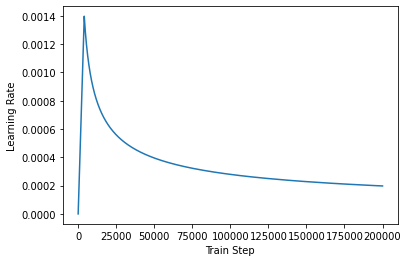

In [79]:
sample_learning_rate = CustomSchedule(d_model=128)

plt.plot(sample_learning_rate(tf.range(200000, dtype=tf.float32)))
plt.ylabel("Learning Rate")
plt.xlabel("Train Step")

[논문에서는 언급되지 않은 트랜스포머의 구현 이야기 : https://tunz.kr/post/4](https://tunz.kr/post/4)

